In [1]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=f1fe6ed13ec1703b3acf68b428e23147c209207f5ebe7740d418e8cdf5c3a72a
  Stored in directory: /root/.cache/pip/wheels/e2/a5/92/2c80d1928733611c2747a9820e1324a6835524d9411510c142
Successfully built seqeval


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from joblib import dump, load

In [4]:
text = []
clas = []
df = pd.read_csv('/content/drive/MyDrive/Hindi AD/new_Manual_dataset.csv',dtype = "str")
df
text = df['manual_trans'].tolist()
clas = df['Labels'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

In [5]:
df

,tweet,class
0,दृश्य रसोई की है। माँ बर्तन पोंछ रही है और पान...,0
1,"ओह, मैं देख रहा हूँ कि सिंक बह निकला है।मैं दे...",0
2,एक लड़का और एक लड़की रसोई में अपनी माँ के साथ ...,0
3,गर्मी का मौसम था और माँ और बच्चे रसोई में काम ...,0
4,जब तक मैं अपना चश्मा नहीं लगाता तब तक प्रतीक्ष...,0
...,...,...
543,अच्छ छोटा बच्चा अपने मल से गिर रहा है। और माँ ...,1
544,महम। अच्छा यह कुकी जार में है। और उसने चढ़ने क...,1
545,हम्म छोटा लड़का स्टूल पर है जो ढो रहा है और वह...,1
546,"ओह, आप चाहते हैं कि मैं आपको बता दूं। माँ और उ...",1


# text cleaning

In [6]:
df['tweet'] = df[['tweet']].apply(lambda x: x.str.strip()).replace('', np.nan)
df = df.dropna(subset=['tweet'])
df.reset_index(drop=True, inplace=True)

In [7]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

In [8]:
punctuation_signs = list("?:!.,;|।")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:   
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

<ipython-input-8-58185447e27a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


In [9]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('।', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

In [10]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-10-969333b8111c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


In [11]:
import re
Tweet = []
for tweettext in df["tweet"]:
  text = re.sub(r"http\S+", "", tweettext)
  text = re.sub(r"@\S+"," ",text)
  emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                            "]+", flags=re.UNICODE)

  text = emoji_pattern.sub('',text)
  text = text.replace("#","")
  text = text.replace("|","")
  text = text.replace('\n',"")
  text = text.replace('!',"")
  text = re.sub("\xa0|©|\xad|⏬|\u200b|\u200c|–|—|‘|’|“|”|•|…|\u202f|‼|⁉|\u2066|ఎ|క|గ|చ|జ|ట|డ|త|న|ప|బ|మ|య|ర|ల|ష|స|హ|ਅ|ਆ|ਇ|ਈ|ਊ|ਓ|ਕ|ਗ|ਚ|ਜ|ਝ|ਟ|ਠ|ਡ|ਤ|ਦ|ਨ|ਪ|ਬ|ਮ|ਰ|ਲ|ਵ|ਸ|ਹ|લ|સ|હ","",text)
  text = re.sub("$|%|&|(|)|-|/|=|@|[|]|_|{|}|~|","",text)
  text = text.replace("+","")
#   text = re.sub(r'\b\d\w*\b', '', text)
#   text = re.sub('[^A-Za-z0-9]+', ' ', text)
#   print(text)
  Tweet.append(text)

In [12]:

corpus = ""
for i in Tweet:
    corpus = corpus + ' ' + i 
letters = set(corpus)

In [13]:
len(list(letters))

73

In [14]:
df["tweet"] = Tweet
df

,tweet,class
0,दृश्य रसोई की है माँ बर्तन पोंछ रही है और पानी...,0
1,ओह मैं देख रहा हूँ कि सिंक बह निकला हैमैं देख ...,0
2,एक लड़का और एक लड़की रसोई में अपनी माँ के साथ ...,0
3,गर्मी का मौसम था और माँ और बच्चे रसोई में काम ...,0
4,जब तक मैं अपना चश्मा नहीं लगाता तब तक प्रतीक्ष...,0
...,...,...
543,अच्छ छोटा बच्चा अपने मल से गिर रहा है और माँ स...,1
544,महम अच्छा यह कुकी जार में है और उसने चढ़ने की ...,1
545,हम्म छोटा लड़का स्टूल पर है जो ढो रहा है और वह...,1
546,ओह आप चाहते हैं कि मैं आपको बता दूं माँ और उसक...,1


In [15]:
# def remove_hindi_stopwords(df):
#     file_s = open('/content/drive/MyDrive/election ls/final_stopwords.txt','r')
#     stop_words = file_s.read()
#     stop_words = stop_words.split()
#     print(stop_words)
#     for stop_word in stop_words:
#         regex_stopword = r"\b" + stop_word + r"\b"
#         df['tweet'] = df['tweet'].str.replace(regex_stopword, '')
#     return df

# df = remove_hindi_stopwords(df)

In [16]:
df

,tweet,class
0,दृश्य रसोई की है माँ बर्तन पोंछ रही है और पानी...,0
1,ओह मैं देख रहा हूँ कि सिंक बह निकला हैमैं देख ...,0
2,एक लड़का और एक लड़की रसोई में अपनी माँ के साथ ...,0
3,गर्मी का मौसम था और माँ और बच्चे रसोई में काम ...,0
4,जब तक मैं अपना चश्मा नहीं लगाता तब तक प्रतीक्ष...,0
...,...,...
543,अच्छ छोटा बच्चा अपने मल से गिर रहा है और माँ स...,1
544,महम अच्छा यह कुकी जार में है और उसने चढ़ने की ...,1
545,हम्म छोटा लड़का स्टूल पर है जो ढो रहा है और वह...,1
546,ओह आप चाहते हैं कि मैं आपको बता दूं माँ और उसक...,1


# ML models

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet']).toarray()
y = df['class'].map(int)

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [19]:
# cv = CountVectorizer()
# X = cv.fit_transform(df['tweet']).toarray()
# y = df['class'].map(int)

In [20]:
metrics_df = pd.DataFrame(index = ["mae macro average","precision macro average", "recall macro average ", "f1 score marco average", "classification_report"])

In [21]:
metrics_df

""
mae macro average
precision macro average
recall macro average
f1 score marco average
classification_report


imbalance upscale


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)

In [23]:
# from imblearn.over_sampling import SMOTE, ADASYN
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [24]:
from imblearn.metrics import macro_averaged_mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
def metrics_print(y_pred, y_test,model,df):


    
    mae = macro_averaged_mean_absolute_error(y_pred, y_test)
    y_pred = y_pred.astype('str')
    y_test =y_test.map(str)
    y_test = y_test.values
    precision = precision_score(y_pred, y_test,average = 'macro')
    recall = recall_score(y_pred, y_test,average = 'macro')
    class_rep = classification_report(y_pred, y_test)
    f1 = f1_score(y_pred, y_test,average = 'macro')
    
    print("Mean Absoulte error", mae)
    print("precision score",precision)
    print("recall score",recall)
    print("classification report")
    print("F1 Score",f1)
    print(class_rep)
    df[model] = [mae,precision, recall,f1,class_rep]
    return df

def plot_confusion_matrix(cm,y_test,y_pred,model,df,classes,
                                            normalize=False,
                                            title='Confusion matrix',
                                                cmap=plt.cm.Blues):
    
    df = metrics_print(y_pred,y_test,model,df)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return df

accuracy is:  0.7272727272727273
Mean Absoulte error 0.2715281989084294
precision score 0.7224025974025974
recall score 0.7284718010915707
classification report
F1 Score 0.7232059645852749
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        68
           1       0.80      0.72      0.76        97

    accuracy                           0.73       165
   macro avg       0.72      0.73      0.72       165
weighted avg       0.74      0.73      0.73       165



['rf.joblib']

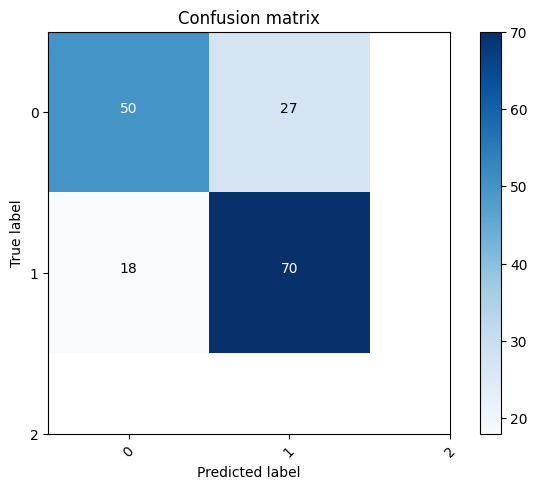

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)

metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Random Forest",metrics_df,classes = range(3))
dump(clf, 'rf.joblib') 

accuracy is:  0.6211180124223602
Mean Absoulte error 0.3792517006802721
precision score 0.6154024767801858
recall score 0.620748299319728
classification report
F1 Score 0.6139088729016787
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        63
           1       0.72      0.62      0.67        98

    accuracy                           0.62       161
   macro avg       0.62      0.62      0.61       161
weighted avg       0.64      0.62      0.63       161



['decision.joblib']

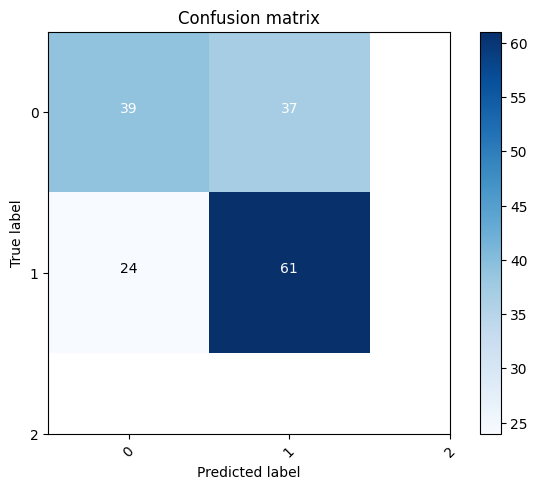

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Decision Tree",metrics_df,classes = range(3))
dump(clf, 'decision.joblib') 

accuracy is:  0.7329192546583851
Mean Absoulte error 0.23788265306122447
precision score 0.7226780185758515
recall score 0.7621173469387755
classification report
F1 Score 0.7188629441624366
              precision    recall  f1-score   support

           0       0.54      0.84      0.66        49
           1       0.91      0.69      0.78       112

    accuracy                           0.73       161
   macro avg       0.72      0.76      0.72       161
weighted avg       0.79      0.73      0.74       161



['GaussianNaiveBayes.joblib']

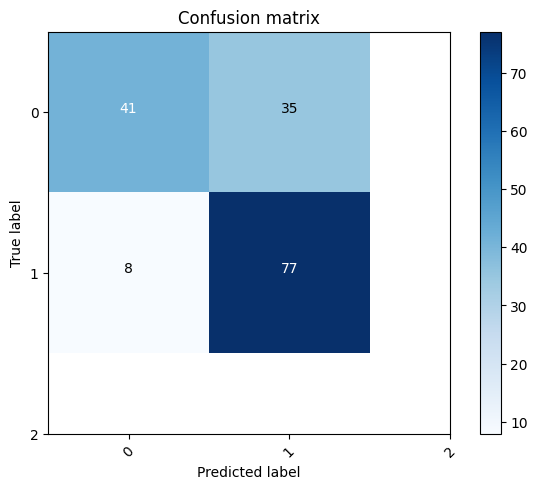

In [ ]:
from sklearn.naive_bayes import MultinomialNB
gau = MultinomialNB()
gau = gau.fit(X_train, y_train)
y_pred = gau.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Multi-Nomial Naive Bayes",metrics_df,classes = range(3))
dump(gau, 'GaussianNaiveBayes.joblib') 

accuracy is:  0.7329192546583851
Mean Absoulte error 0.2676681195516812
precision score 0.7310371517027863
recall score 0.7323318804483188
classification report
F1 Score 0.7314272413391782
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        73
           1       0.76      0.74      0.75        88

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



['SVM.joblib']

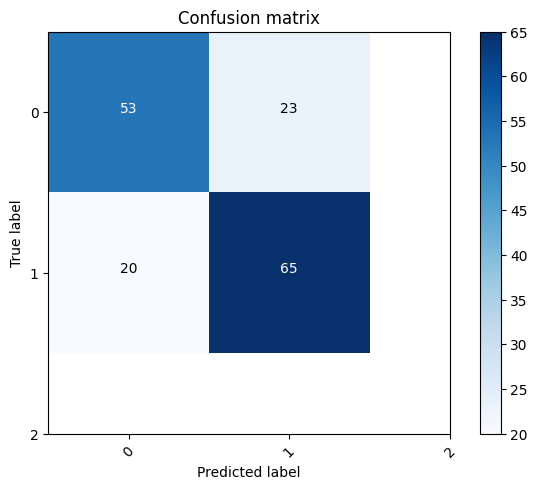

In [ ]:
from sklearn.svm import SVC
svm = SVC(max_iter = 1000)
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"SVC",metrics_df,classes = range(3))
dump(svm, 'SVM.joblib') 

accuracy is:  0.7267080745341615
Mean Absoulte error 0.2693298969072165
precision score 0.721671826625387
recall score 0.7306701030927836
classification report
F1 Score 0.7219780219780221
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        64
           1       0.81      0.71      0.76        97

    accuracy                           0.73       161
   macro avg       0.72      0.73      0.72       161
weighted avg       0.74      0.73      0.73       161



['LogisticRegression.joblib']

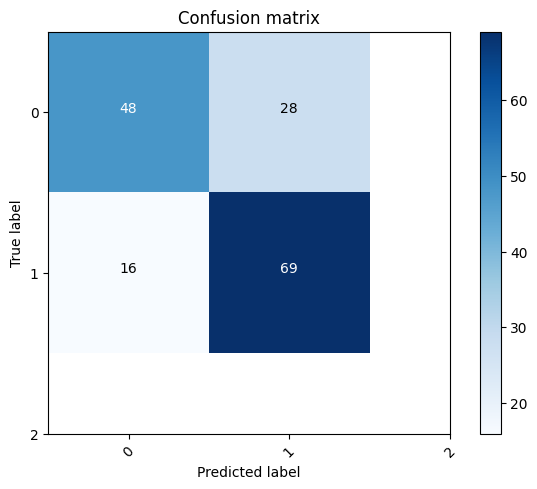

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter = 1000)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Logistic Regression",metrics_df,classes = range(3))
dump(logi, 'LogisticRegression.joblib') 

accuracy is:  0.7090909090909091
Mean Absoulte error 0.29115384615384615
precision score 0.701111111111111
recall score 0.7088461538461539
classification report
F1 Score 0.7022556390977444
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        65
           1       0.79      0.71      0.75       100

    accuracy                           0.71       165
   macro avg       0.70      0.71      0.70       165
weighted avg       0.72      0.71      0.71       165



['XGB.joblib']

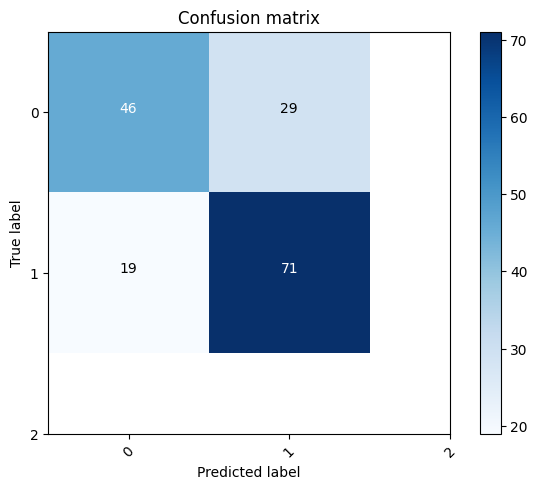

In [26]:
from xgboost import XGBClassifier
logi = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"XGB",metrics_df,classes = range(3))
dump(logi, 'XGB.joblib') 



accuracy is:  0.7151515151515152
Mean Absoulte error 0.28535353535353536
precision score 0.7077777777777778
recall score 0.7146464646464646
classification report
F1 Score 0.7089947089947091
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        66
           1       0.79      0.72      0.75        99

    accuracy                           0.72       165
   macro avg       0.71      0.71      0.71       165
weighted avg       0.72      0.72      0.72       165



['ADA.joblib']

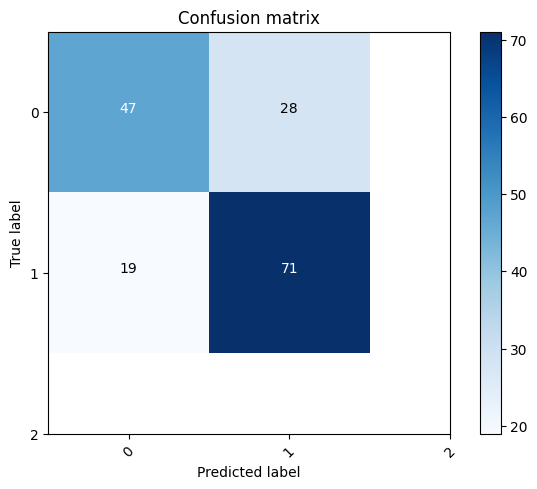

In [25]:
from sklearn.ensemble import  AdaBoostClassifier

logi = AdaBoostClassifier(random_state=42, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"ADA",metrics_df,classes = range(3))
dump(logi, 'ADA.joblib') 

In [27]:
metrics_df #manual

,ADA,XGB
mae macro average,0.285354,0.291154
precision macro average,0.707778,0.701111
recall macro average,0.714646,0.708846
f1 score marco average,0.708995,0.702256
classification_report,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
metrics_df #manual

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression
mae macro average,0.287982,0.379252,0.237883,0.267668,0.26933
precision macro average,0.702632,0.615402,0.722678,0.731037,0.721672
recall macro average,0.712018,0.620748,0.762117,0.732332,0.73067
f1 score marco average,0.70252,0.613909,0.718863,0.731427,0.721978
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
metrics_df #old-smote

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression
mae macro average,0.249073,0.372106,0.296537,0.267857,0.267136
precision macro average,0.751471,0.628251,0.703715,0.73243,0.730341
recall macro average,0.750927,0.627894,0.703463,0.732143,0.732864
f1 score marco average,0.751082,0.6272,0.701852,0.732258,0.730884
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
